<a href="https://colab.research.google.com/github/Viddesh1/TCS_Sem_3_IA1_IA2/blob/main/TCS_Sem-3/IA_1/1_Minimal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Question :-
# In this assignment candidate will train the model to detect the following:-
# 'airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck'.
# CIFAR-10 Dataset to be used for this Industry assignment.

In [2]:
# Mounting the Google Drive

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!mkdir -p "/content/drive/My Drive/TCS_Sem3_IA1_output" # Then making a directory for storing all the results

### CIFAR dataset

The CIFAR-10 "Canadian Institute for Advanced Research 10" dataset is a popular benchmark dataset for training and evaluating machine learning models, especially Convolutional Neural Networks (CNNs), in the field of computer vision. It consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is split into 50,000 training images and 10,000 test images.

In [4]:
# Importing all the necessary libraries

from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# from tensorflow.image import rgb_to_grayscale
# from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.utils import to_categorical


import tensorflow
import matplotlib
import sklearn
import seaborn
import cv2
print(f"Tensorflow version:- {tensorflow.__version__}")
print(f"Matplotlib version:- {matplotlib.__version__}")
print(f"Numpy version:- {np.__version__}")
print(f"Scikit-learn :- {sklearn.__version__}")
print(f"Sebaorn :- {seaborn.__version__}")
print(f"opencv-python :- {cv2.__version__}")

Tensorflow version:- 2.13.0
Matplotlib version:- 3.7.1
Numpy version:- 1.23.5
Scikit-learn :- 1.2.2
Sebaorn :- 0.12.2
opencv-python :- 4.8.0


In [5]:
# Loading the data in train image, train labels and test image and test labels using load_data() method.

(X_train_images, y_train_labels), (X_test_images, y_test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


The X_train_images array is a 4-dimensional NumPy array that holds the training images. Its shape is (num_samples, height, width, num_channels) where:

num_samples is the number of images in the training set.
height is the height of each image in pixels.
width is the width of each image in pixels.
num_channels is the number of color channels in each image (usually 3 for RGB images).
For the CIFAR-10 dataset specifically, X_train_images.shape would be something like (50000, 32, 32, 3), indicating that there are 50,000 training images, each with dimensions 32x32 pixels and 3 color channels (RGB).

In [6]:
# Dataset label numbers and there names

# 1 --> Airplane
# 2 --> Automobile
# 3 --> Bird
# 4 --> Cat
# 5 --> Deer
# 6 --> Dog
# 7 --> Frog
# 8 --> Horse
# 9 --> Ship
# 10 --> Truck

In [7]:
# Define class names
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Print labels and their corresponding class names
for label in y_train_labels[0:10:1]:  # Print the first 10 labels
    class_name = class_names[label[0]]
    print(f"Label: {label[0]} - Class Name: {class_name}")

Label: 6 - Class Name: Frog
Label: 9 - Class Name: Truck
Label: 9 - Class Name: Truck
Label: 4 - Class Name: Deer
Label: 1 - Class Name: Automobile
Label: 1 - Class Name: Automobile
Label: 2 - Class Name: Bird
Label: 7 - Class Name: Horse
Label: 8 - Class Name: Ship
Label: 3 - Class Name: Cat


In [8]:
# Display the information about the X_train_images

print(f"{' Information regarding the X_train_images ':#^70}", end = "\n\n")
print(f"X_train_images shape:- {X_train_images.shape}")
print(f"Number of sample images of X_train_images:- {X_train_images.shape[0]}")
print(f"X_train_images Image height :- {X_train_images.shape[1]}")
print(f"X_train_images Image width:- {X_train_images.shape[2]}")
print(f"X_train_images Colour channels:- {X_train_images.shape[3]}")
print(f"Shape of the first image in X_train_images:- {X_train_images[0].shape}")
print(f"Height of the first image in X_train_images:- {X_train_images[0].shape[0]}")
print(f"Width of the first image in X_train_images:- {X_train_images[0].shape[1]}")
print(f"Number of channels in the first image:- {X_train_images[0].shape[2]}")
# Finding out what is the mininum and maximum value in X_train_images and X_test_images
# Before pre-processing the image data. Color channels ranges from 0 to 255
print(f"Maximum value in X_train_images:- { float(np.max(X_train_images[0])) }")
print(f"Minimum value of the X_train_images:- { float(np.min(X_train_images[0])) }")

############## Information regarding the X_train_images ##############

X_train_images shape:- (50000, 32, 32, 3)
Number of sample images of X_train_images:- 50000
X_train_images Image height :- 32
X_train_images Image width:- 32
X_train_images Colour channels:- 3
Shape of the first image in X_train_images:- (32, 32, 3)
Height of the first image in X_train_images:- 32
Width of the first image in X_train_images:- 32
Number of channels in the first image:- 3
Maximum value in X_train_images:- 255.0
Minimum value of the X_train_images:- 0.0


In [9]:
# Display the information of y_train_labels

print(f"{' Information of y_train_labels ':#^70}", end = "\n\n")
print(f"y_train_labels shape:- {y_train_labels.shape}")
print(f"Number of labels in the y_train_labels :- {y_train_labels.shape[0]}")
print(f"Labels of y_train_labels :- {y_train_labels.shape[1]}")
print("Number of classes:- ", len(set(y_train_labels.flatten()))) # (50000,)

################### Information of y_train_labels ####################

y_train_labels shape:- (50000, 1)
Number of labels in the y_train_labels :- 50000
Labels of y_train_labels :- 1
Number of classes:-  10


In [10]:
# Display the information about the X_test_images

print(f"{' Information regarding the X_test_images ':#^70}", end = "\n\n")
print(f"X_test_images shape:- {X_test_images.shape}")
print(f"Number of sample images of X_test_images:- {X_test_images.shape[0]}")
print(f"X_test_images Image height :- {X_test_images.shape[1]}")
print(f"X_test_images Image width:- {X_test_images.shape[2]}")
print(f"X_test_images Colour channels:- {X_test_images.shape[3]}")
print(f"Shape of the first image in X_test_images:- {X_test_images[0].shape}")
print(f"Height of the first image in X_test_images:- {X_test_images[0].shape[0]}")
print(f"Width of the first image in X_test_images:- {X_test_images[0].shape[1]}")
print(f"Number of channels in the first image:- {X_test_images[0].shape[2]}")
# Finding out what is the mininum and maximum value in X_train_images
# Before pre-processing the image data. Color channels ranges from 0 to 255
print(f"Maximum value in X_test_images:- { float(np.max(X_test_images[0])) }")
print(f"Minimum value of the X_test_images:- { float(np.min(X_test_images[0])) }")

############## Information regarding the X_test_images ###############

X_test_images shape:- (10000, 32, 32, 3)
Number of sample images of X_test_images:- 10000
X_test_images Image height :- 32
X_test_images Image width:- 32
X_test_images Colour channels:- 3
Shape of the first image in X_test_images:- (32, 32, 3)
Height of the first image in X_test_images:- 32
Width of the first image in X_test_images:- 32
Number of channels in the first image:- 3
Maximum value in X_test_images:- 255.0
Minimum value of the X_test_images:- 13.0


In [11]:
# Display the information of y_test_labels

print(f"{' Information of y_test_labels ':#^70}", end = "\n\n")
print(f"y_test_labels shape:- {y_test_labels.shape}")
print(f"Number of labels in the y_test_labels :- {y_test_labels.shape[0]}")
print(f"Labels of y_test_labels :- {y_test_labels.shape[1]}")
print("Number of classes:- ", len(set(y_test_labels.flatten()))) # (10000,)

#################### Information of y_test_labels ####################

y_test_labels shape:- (10000, 1)
Number of labels in the y_test_labels :- 10000
Labels of y_test_labels :- 1
Number of classes:-  10


In [12]:
# Preprocessing the train images and test images.
# Normalizing the values from 0 to 255 to 0.0 to 1.0
# using float of maximum in first image of X_train_images and X_test_images

X_train_images = X_train_images / float(np.max(X_train_images[0]))
X_test_images = X_test_images / float(np.max(X_test_images[0]))

In [13]:
# After processing of the image data

print("Maximum value of the train images:- ", np.max(X_train_images))
print("Minimum value of the train images:- ", np.min(X_train_images))

Maximum value of the train images:-  1.0
Minimum value of the train images:-  0.0


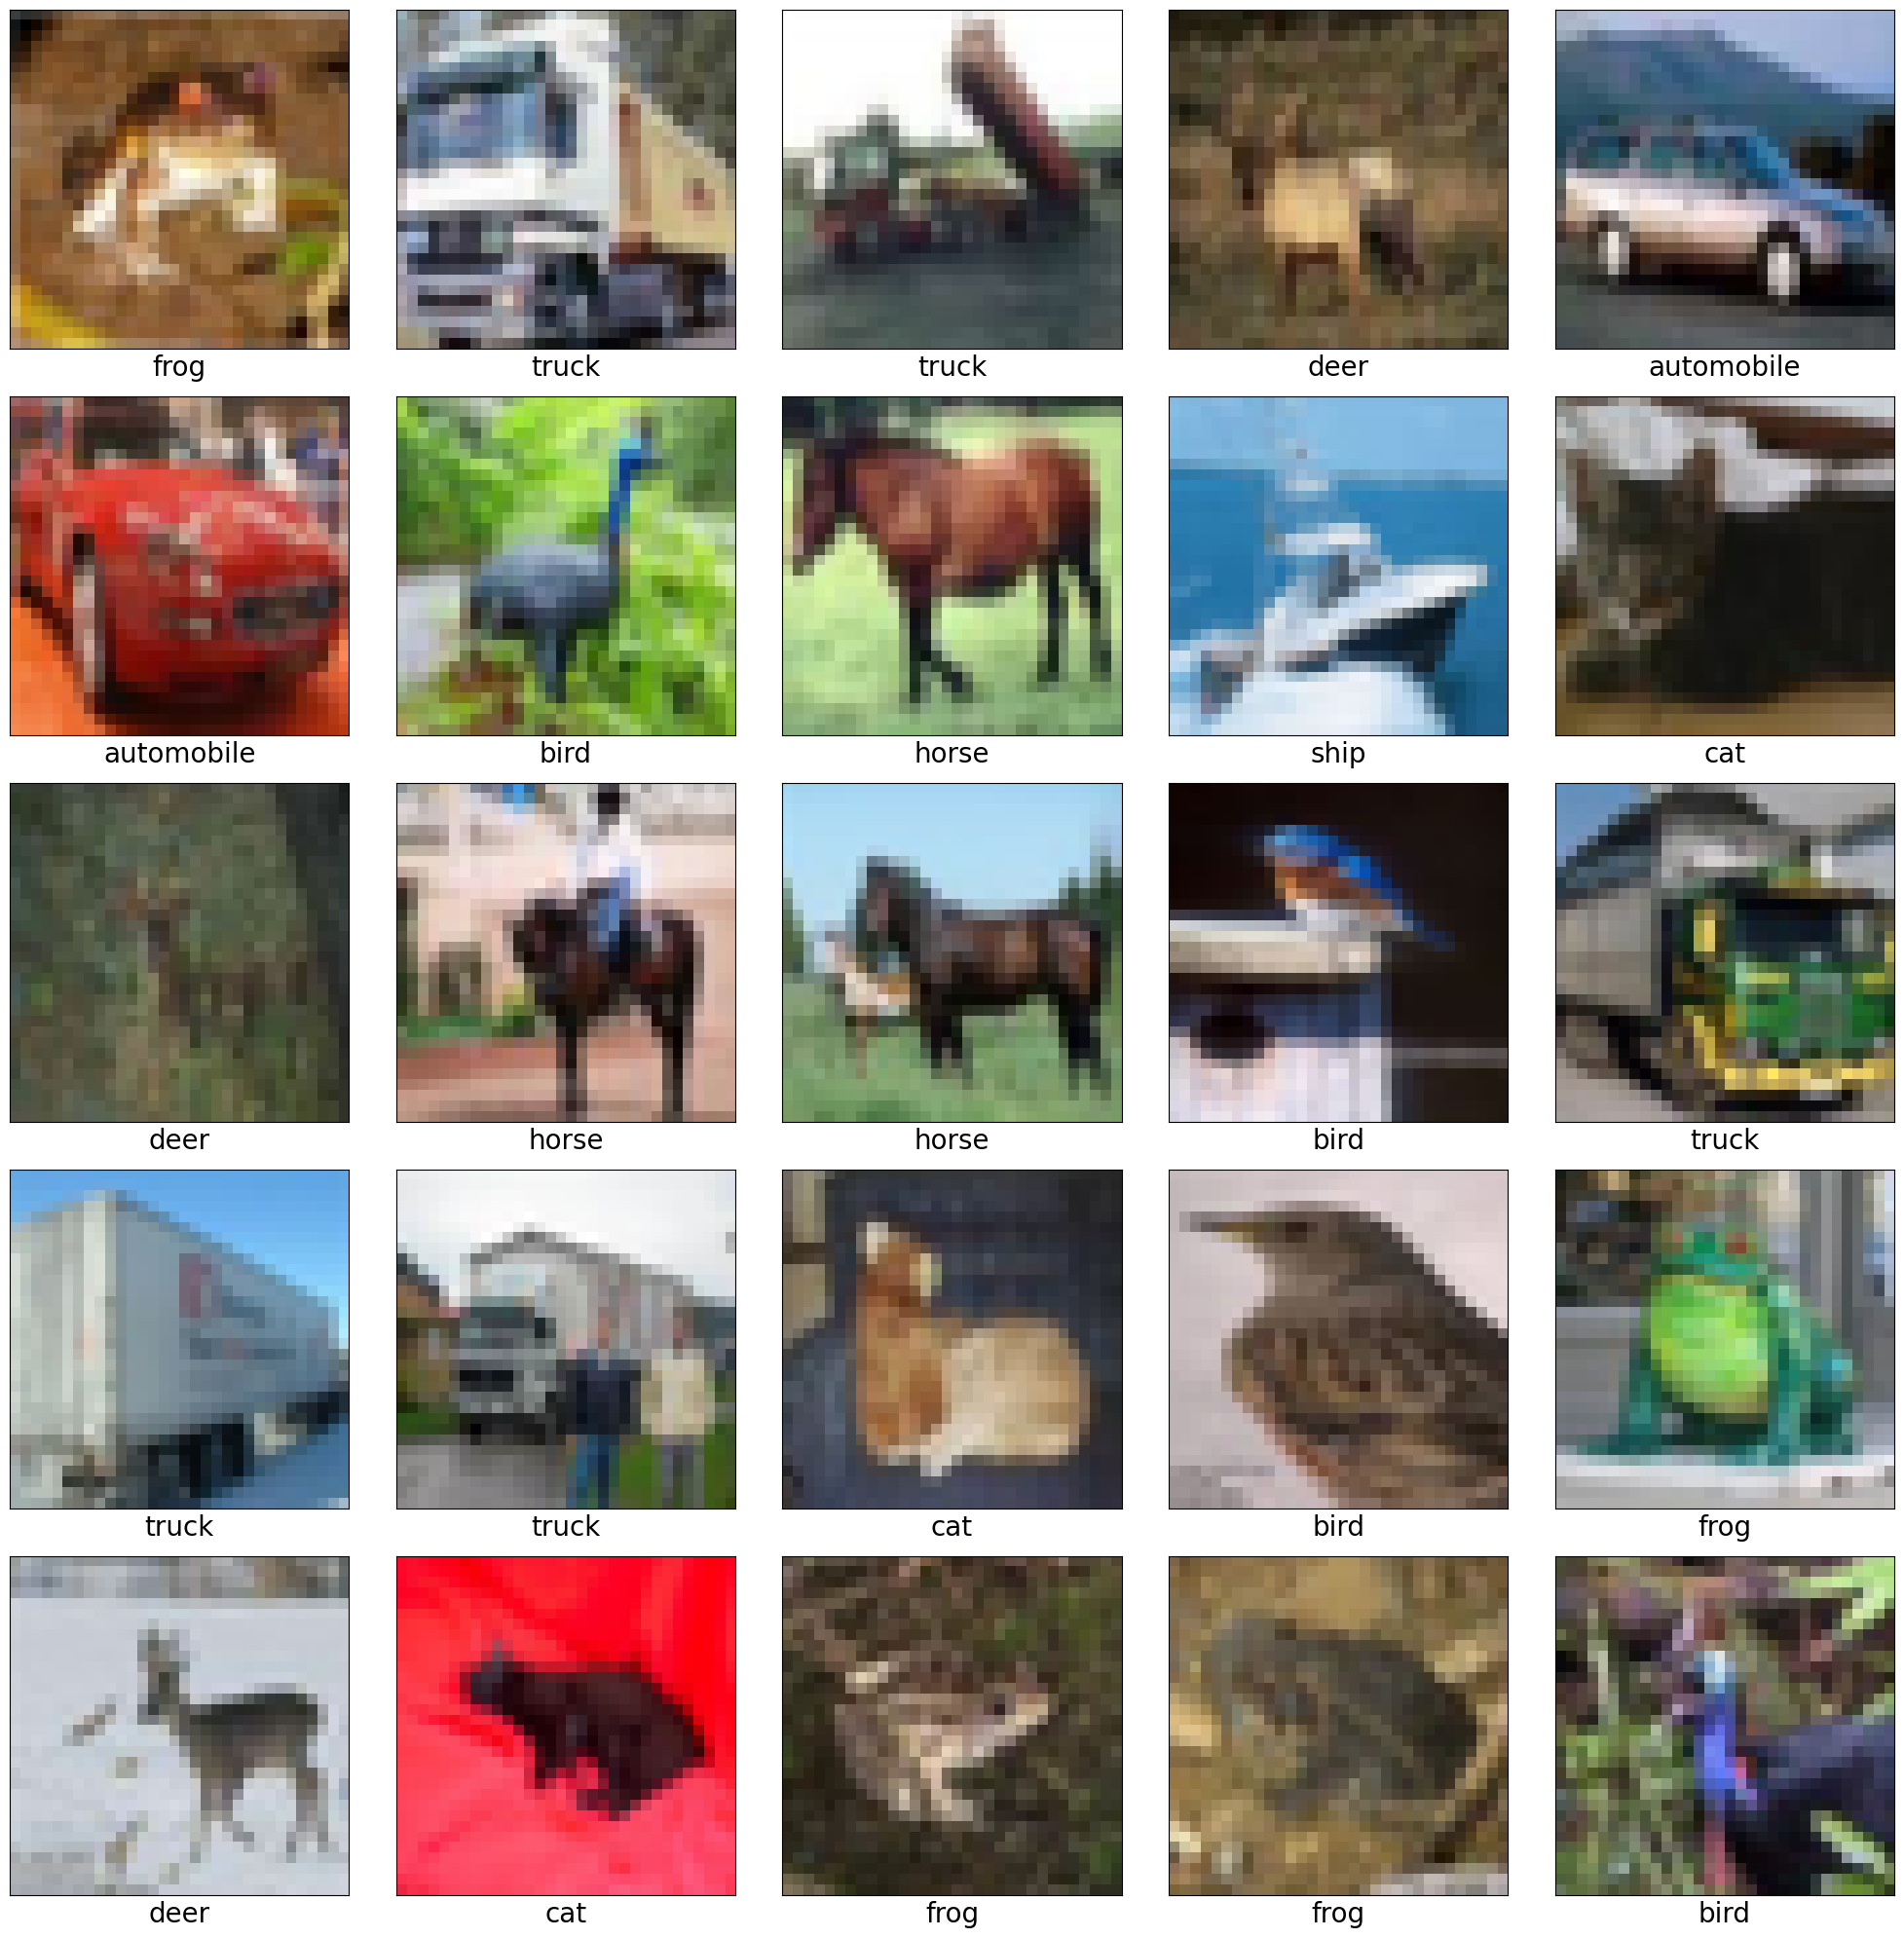

In [14]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize = (20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    # plt.grid(True)
    plt.imshow(X_train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why we would need the extra index
    plt.xlabel(class_names[y_train_labels[i][0]], fontsize = 20)

# Save the plot before displaying it
plot_filename = '/content/drive/My Drive/TCS_Sem3_IA1_output/CIFAR_1.png'  # Specify the desired file name and extension
plt.savefig(plot_filename)

plt.tight_layout()
plt.show()

In [15]:
# Now!, We can proceed with the creation of the CNN model

model = Sequential(
    [
        Conv2D(input_shape = (32, 32, 3), filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = "relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
        Flatten(),
        Dense(units = 64, activation = "relu"),
        Dense(10, activation = "softmax")
    ]
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [17]:
y_train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
y_test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [19]:
y_train_labels = to_categorical(y_train_labels, num_classes = 10)
y_test_labels = to_categorical(y_test_labels, num_classes = 10)

In [20]:
# compile a and train the model.

model.compile(optimizer = "adam", loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# Train the model with batch size and epochs
batch_size = 64 # Based in RAM
epochs = 10
history = model.fit(X_train_images, y_train_labels, batch_size = batch_size, epochs = epochs, validation_data = (X_test_images, y_test_labels))

Epoch 1/10
782/782 [==============================] - 16s 7ms/step - loss: 1.6051 - accuracy: 0.4143 - val_loss: 1.3676 - val_accuracy: 0.5101
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 1.2580 - accuracy: 0.5526 - val_loss: 1.2028 - val_accuracy: 0.5648
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 1.1167 - accuracy: 0.6067 - val_loss: 1.1242 - val_accuracy: 0.6044
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 1.0157 - accuracy: 0.6435 - val_loss: 1.0724 - val_accuracy: 0.6246
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9353 - accuracy: 0.6732 - val_loss: 1.0124 - val_accuracy: 0.6457
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 0.8767 - accuracy: 0.6936 - val_loss: 0.9308 - val_accuracy: 0.6729
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8237 - accuracy: 0.7139 - val_loss: 0.9304 - val_accuracy: 0.6775
Epoch

In [21]:
# Saving the entire model (Architecture and Weights) in current working directory.

model.save("/content/drive/My Drive/TCS_Sem3_IA1_output/IA_1_model.keras")

In [22]:
model = load_model("/content/drive/My Drive/TCS_Sem3_IA1_output/IA_1_model.keras")

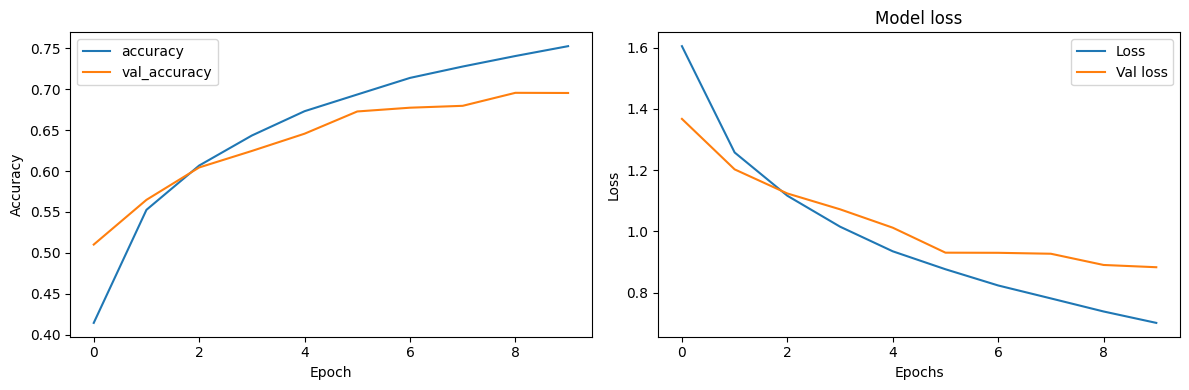

In [23]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot of model accuracy
ax1.plot(history.history["accuracy"], label="accuracy")
ax1.plot(history.history["val_accuracy"], label="val_accuracy")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.legend(loc="upper left")

# Plot for model loss
ax2.plot(history.history["loss"], label="Loss")
ax2.plot(history.history["val_loss"], label="Val loss")
ax2.set_title("Model loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["Loss", "Val loss"], loc='upper right')

# Save the plot before displaying it
plot_filename = '/content/drive/My Drive/TCS_Sem3_IA1_output/Accuracy_Loss.png'  # Specify the desired file name and extension
plt.savefig(plot_filename)

# Adjust layout for better spacing between subplots
plt.tight_layout()

plt.show()


In [24]:
test_loss, test_acc = model.evaluate(X_test_images, y_test_labels, verbose = 2)
print(f"Model loss :- {test_loss}")
print(f"Model Accuracy :- {test_acc}")

313/313 - 1s - loss: 0.8833 - accuracy: 0.6955 - 1s/epoch - 3ms/step
Model loss :- 0.8832983374595642
Model Accuracy :- 0.6955000162124634


In [25]:
# Model prediction and classification report
X_test_predictions = model.predict(X_test_images)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test_labels, axis = 1)

# Generating the classification report
print("Classification report")
print(classification_report(y_test_true_labels, y_test_pred_labels, zero_division=0))

313/313 [==============================] - 1s 3ms/step
Classification report
              precision    recall  f1-score   support

           0       0.77      0.63      0.69      1000
           1       0.86      0.78      0.82      1000
           2       0.55      0.64      0.59      1000
           3       0.64      0.32      0.43      1000
           4       0.62      0.71      0.66      1000
           5       0.60      0.63      0.62      1000
           6       0.65      0.87      0.74      1000
           7       0.79      0.72      0.75      1000
           8       0.81      0.81      0.81      1000
           9       0.73      0.84      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



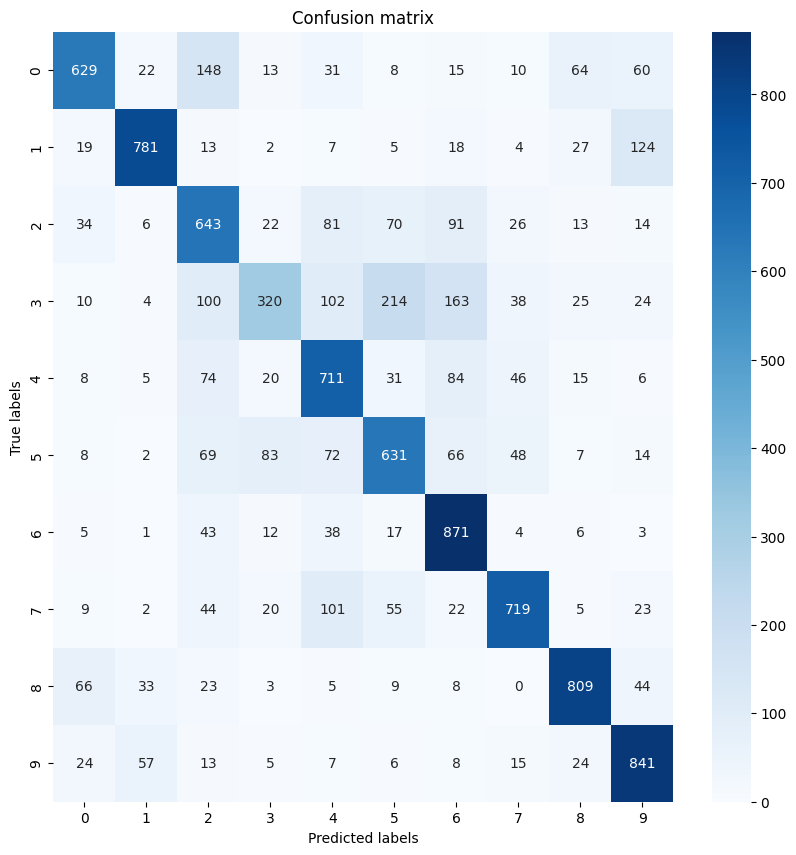

In [26]:
# Generate the Confusion matrix
conf_matrix = confusion_matrix(y_test_true_labels, y_test_pred_labels)

# Plotting the confusion matrix in the form of heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
xtickslabels = range(0, 10, 1)
ytickslabels = range(0, 10, 1)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")

# Save the plot before displaying it
plot_filename = '/content/drive/My Drive/TCS_Sem3_IA1_output/CM_1.png'  # Specify the desired file name and extension
plt.savefig(plot_filename)

plt.show()


313/313 [==============================] - 1s 2ms/step


<ipython-input-27-8eed5057aa83>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i + 1)


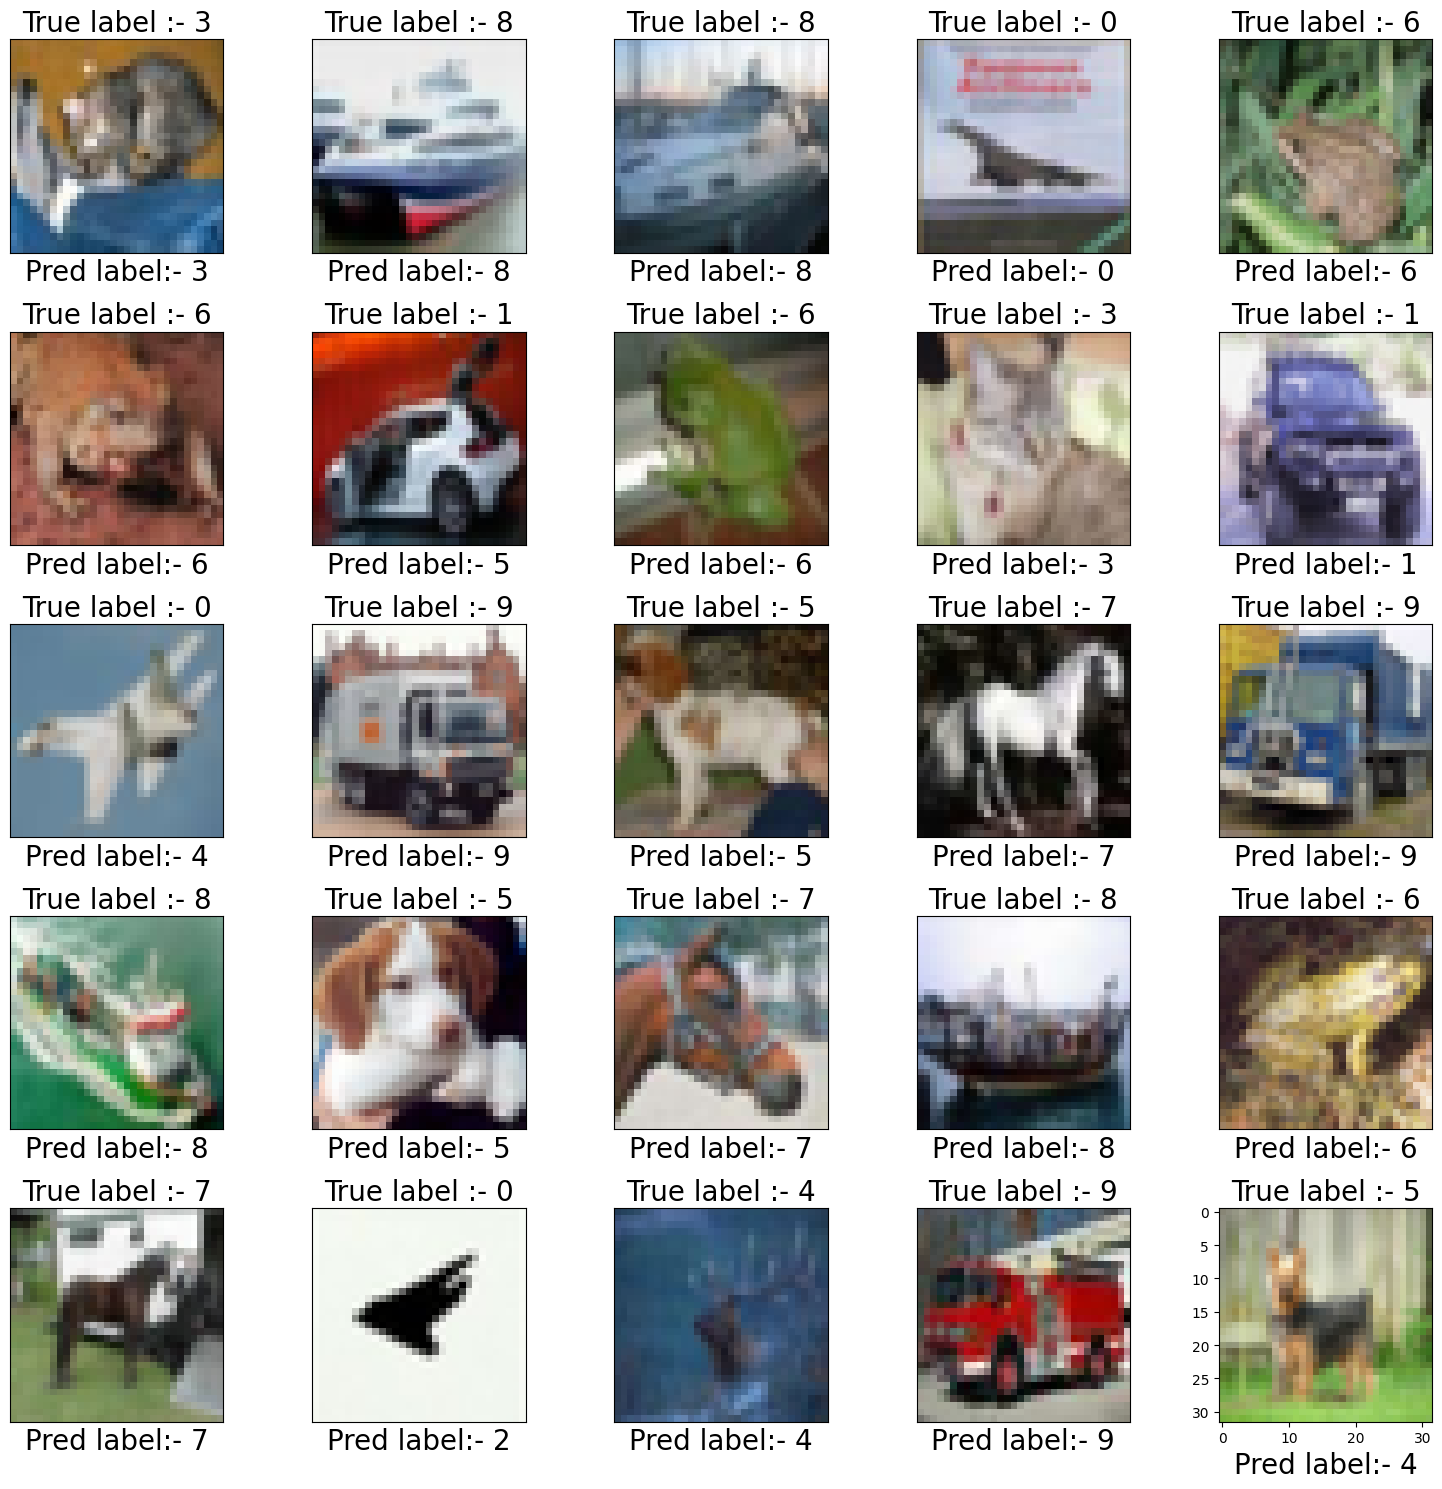

In [27]:
# Visualization of predicted data

# Model prediction
X_test_predictions = model.predict(X_test_images)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test_labels, axis = 1)

plt.figure(figsize = (15, 15))
for i in range(0, 25, 1):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test_images[i], cmap = "gray")
    plt.title(f"True label :- {y_test_true_labels[i]}", fontsize = 20)
    plt.xlabel(f"Pred label:- {y_test_pred_labels[i]}", fontsize = 20)

# Save the plot before displaying it
plot_filename = '/content/drive/My Drive/TCS_Sem3_IA1_output/CIFAR_predicted.png'  # Specify the desired file name and extension
plt.savefig(plot_filename)

plt.tight_layout()
plt.show()

In [28]:

# Loading the CIFAR-10 dataset for testing on grey scale
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = cifar10.load_data()

# Convert to grayscale using cv2.cvtColor
X_train_images_gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_train_images])
X_test_images_gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_test_images])

# Normalize grayscale pixel values between 0 and 1
X_train_images_gray = X_train_images_gray / 255.0
X_test_images_gray = X_test_images_gray / 255.0

# Check max and min pixel values after normalization
print("Maximum value of the train images:", np.max(X_train_images_gray))
print("Minimum value of the train images:", np.min(X_test_images_gray))


Maximum value of the train images: 1.0
Minimum value of the train images: 0.0


In [29]:
X_train_images_gray = np.expand_dims(X_train_images_gray, axis = -1)
X_test_images_gray = np.expand_dims(X_test_images_gray, axis = -1)

In [30]:
print(X_train_images_gray.shape)
print(X_test_images_gray.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)


In [31]:
# One-Hot Encoding test labels and train labels

y_train_labels = to_categorical(y_train_labels, num_classes = 10)
y_test_labels = to_categorical(y_test_labels, num_classes = 10)

In [36]:
y_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

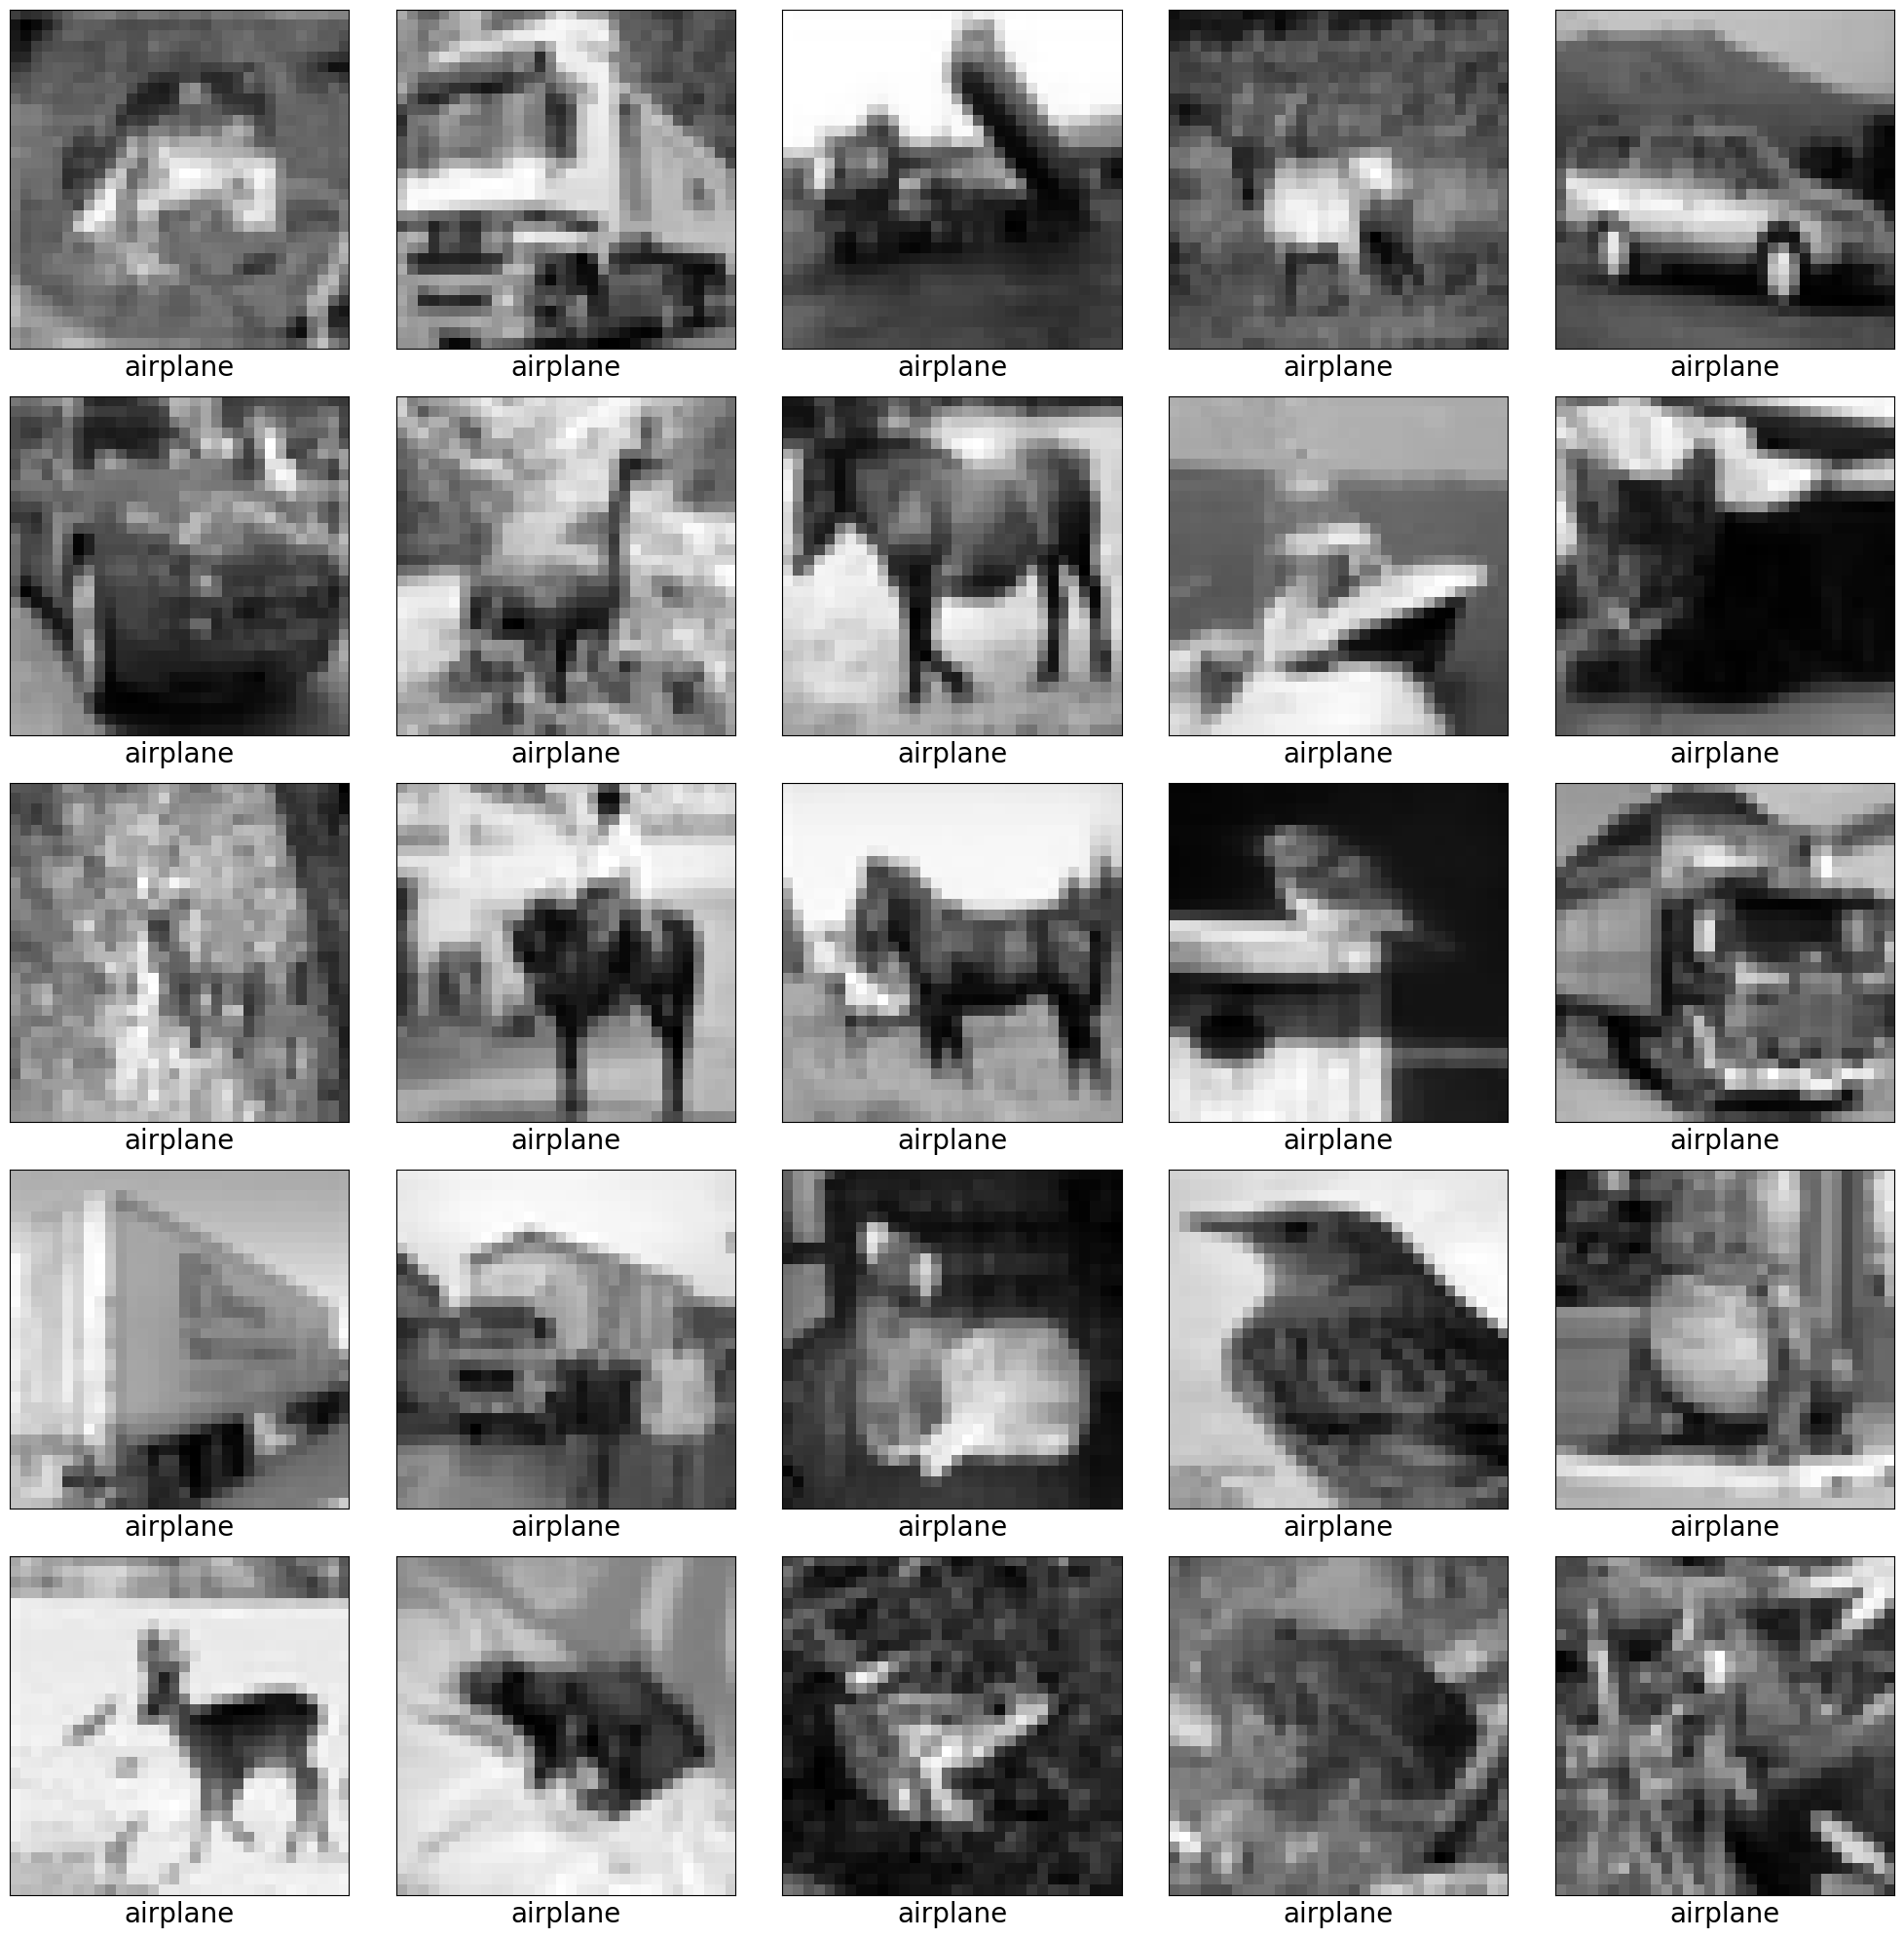

In [38]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize = (20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    # plt.grid(True)
    plt.imshow(X_train_images_gray[i], cmap = "gray")
    # The CIFAR labels happen to be arrays,
    # which is why we would need the extra index
    plt.xlabel(class_names[int(y_train_labels[i][0])], fontsize = 20)

# Save the plot before displaying it
plot_filename = '/content/drive/My Drive/TCS_Sem3_IA1_output/CIFAR_Grey.png'  # Specify the desired file name and extension
plt.savefig(plot_filename)

plt.tight_layout()
plt.show()

In [39]:
# Now!, We can proceed with the creation of the CNN model on grey scale images

model = Sequential(
    [
        Conv2D(input_shape = (32, 32, 1), filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = "relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
        Flatten(),
        Dense(units = 64, activation = "relu"),
        Dense(10, activation = "softmax")
    ]
)

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [41]:
# compile a and train the model.

model.compile(optimizer = "adam", loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# Train the model with batch size and epochs
batch_size = 64 # Based on RAM size
epochs = 10
history = model.fit(X_train_images_gray, y_train_labels, batch_size = batch_size, epochs = epochs, validation_data = (X_test_images_gray, y_test_labels))

Epoch 1/10
782/782 [==============================] - 7s 6ms/step - loss: 1.7359 - accuracy: 0.3738 - val_loss: 1.4632 - val_accuracy: 0.4802
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.3874 - accuracy: 0.5121 - val_loss: 1.3498 - val_accuracy: 0.5214
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 1.2445 - accuracy: 0.5654 - val_loss: 1.2150 - val_accuracy: 0.5711
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1432 - accuracy: 0.5987 - val_loss: 1.2795 - val_accuracy: 0.5555
Epoch 5/10
782/782 [==============================] - 4s 6ms/step - loss: 1.0688 - accuracy: 0.6296 - val_loss: 1.1857 - val_accuracy: 0.5881
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 1.0073 - accuracy: 0.6488 - val_loss: 1.0660 - val_accuracy: 0.6295
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.9548 - accuracy: 0.6659 - val_loss: 1.0629 - val_accuracy: 0.6348
Epoch 

In [42]:
# Saving the entire model (Architecture and Weights) in current working directory.

model.save("/content/drive/My Drive/TCS_Sem3_IA1_output/IA_2_Grey_model.keras")

In [43]:
model = load_model("/content/drive/My Drive/TCS_Sem3_IA1_output/IA_2_Grey_model.keras")

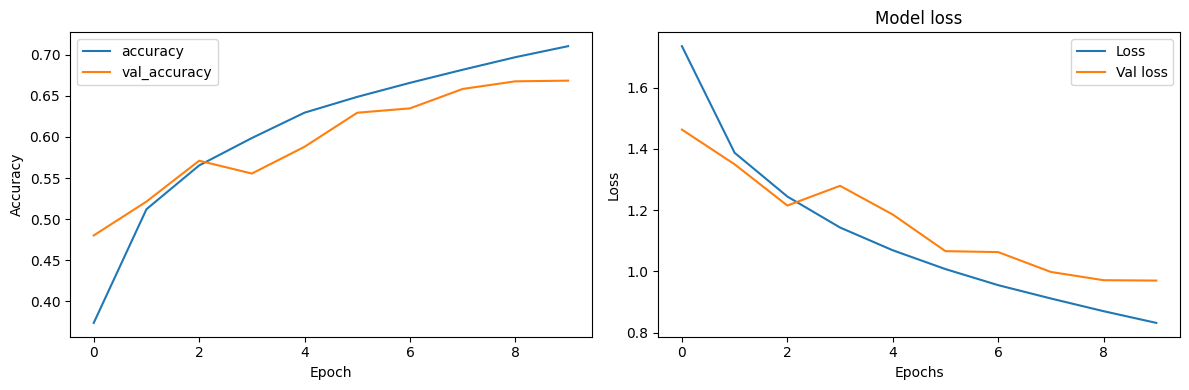

In [44]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot of model accuracy
ax1.plot(history.history["accuracy"], label="accuracy")
ax1.plot(history.history["val_accuracy"], label="val_accuracy")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.legend(loc="upper left")

# Plot for model loss
ax2.plot(history.history["loss"], label="Loss")
ax2.plot(history.history["val_loss"], label="Val loss")
ax2.set_title("Model loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["Loss", "Val loss"], loc='upper right')

# Save the plot before displaying it
plot_filename = '/content/drive/My Drive/TCS_Sem3_IA1_output/CIFAR_Grey_Accuracy_loss.png'  # Specify the desired file name and extension
plt.savefig(plot_filename)

# Adjust layout for better spacing between subplots
plt.tight_layout()

plt.show()


In [45]:
test_loss, test_acc = model.evaluate(X_test_images_gray, y_test_labels, verbose = 2)
print(f"Model loss :- {test_loss}")
print(f"Model Accuracy :- {test_acc}")

313/313 - 1s - loss: 0.9698 - accuracy: 0.6685 - 959ms/epoch - 3ms/step
Model loss :- 0.9698185324668884
Model Accuracy :- 0.6685000061988831


In [46]:
print(f"{round(test_acc * 100, 3) } %")

66.85 %


In [47]:
# Model prediction and classification report
X_test_predictions = model.predict(X_test_images_gray)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test_labels, axis = 1)

# Generating the classification report
print("Classification report")
print(classification_report(y_test_true_labels, y_test_pred_labels, zero_division=0))

313/313 [==============================] - 1s 2ms/step
Classification report
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1000
           1       0.88      0.74      0.80      1000
           2       0.51      0.59      0.55      1000
           3       0.46      0.49      0.48      1000
           4       0.67      0.54      0.59      1000
           5       0.56      0.62      0.59      1000
           6       0.73      0.76      0.75      1000
           7       0.78      0.64      0.71      1000
           8       0.81      0.75      0.78      1000
           9       0.76      0.78      0.77      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



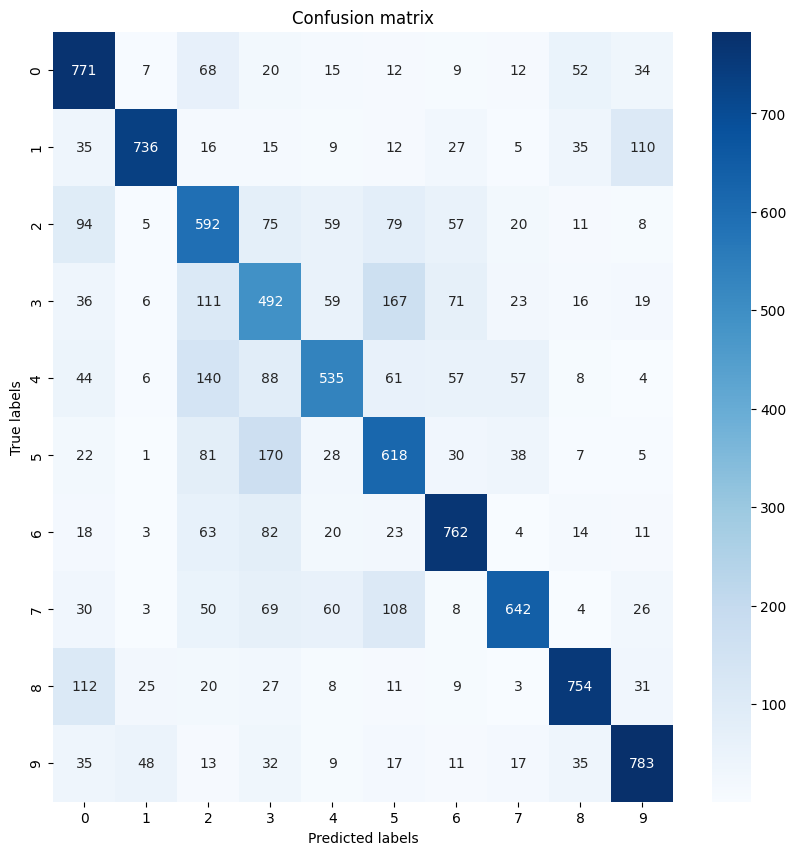

In [48]:
# Generate the Confusion matrix
conf_matrix = confusion_matrix(y_test_true_labels, y_test_pred_labels)

# Plotting the confusion matrix in the form of heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
xtickslabels = range(0, 10, 1)
ytickslabels = range(0, 10, 1)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")

# Save the plot before displaying it
plot_filename = '/content/drive/My Drive/TCS_Sem3_IA1_output/CM_2.png'  # Specify the desired file name and extension
plt.savefig(plot_filename)

plt.show()

313/313 [==============================] - 1s 2ms/step


<ipython-input-49-fb70c35bc423>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i + 1)


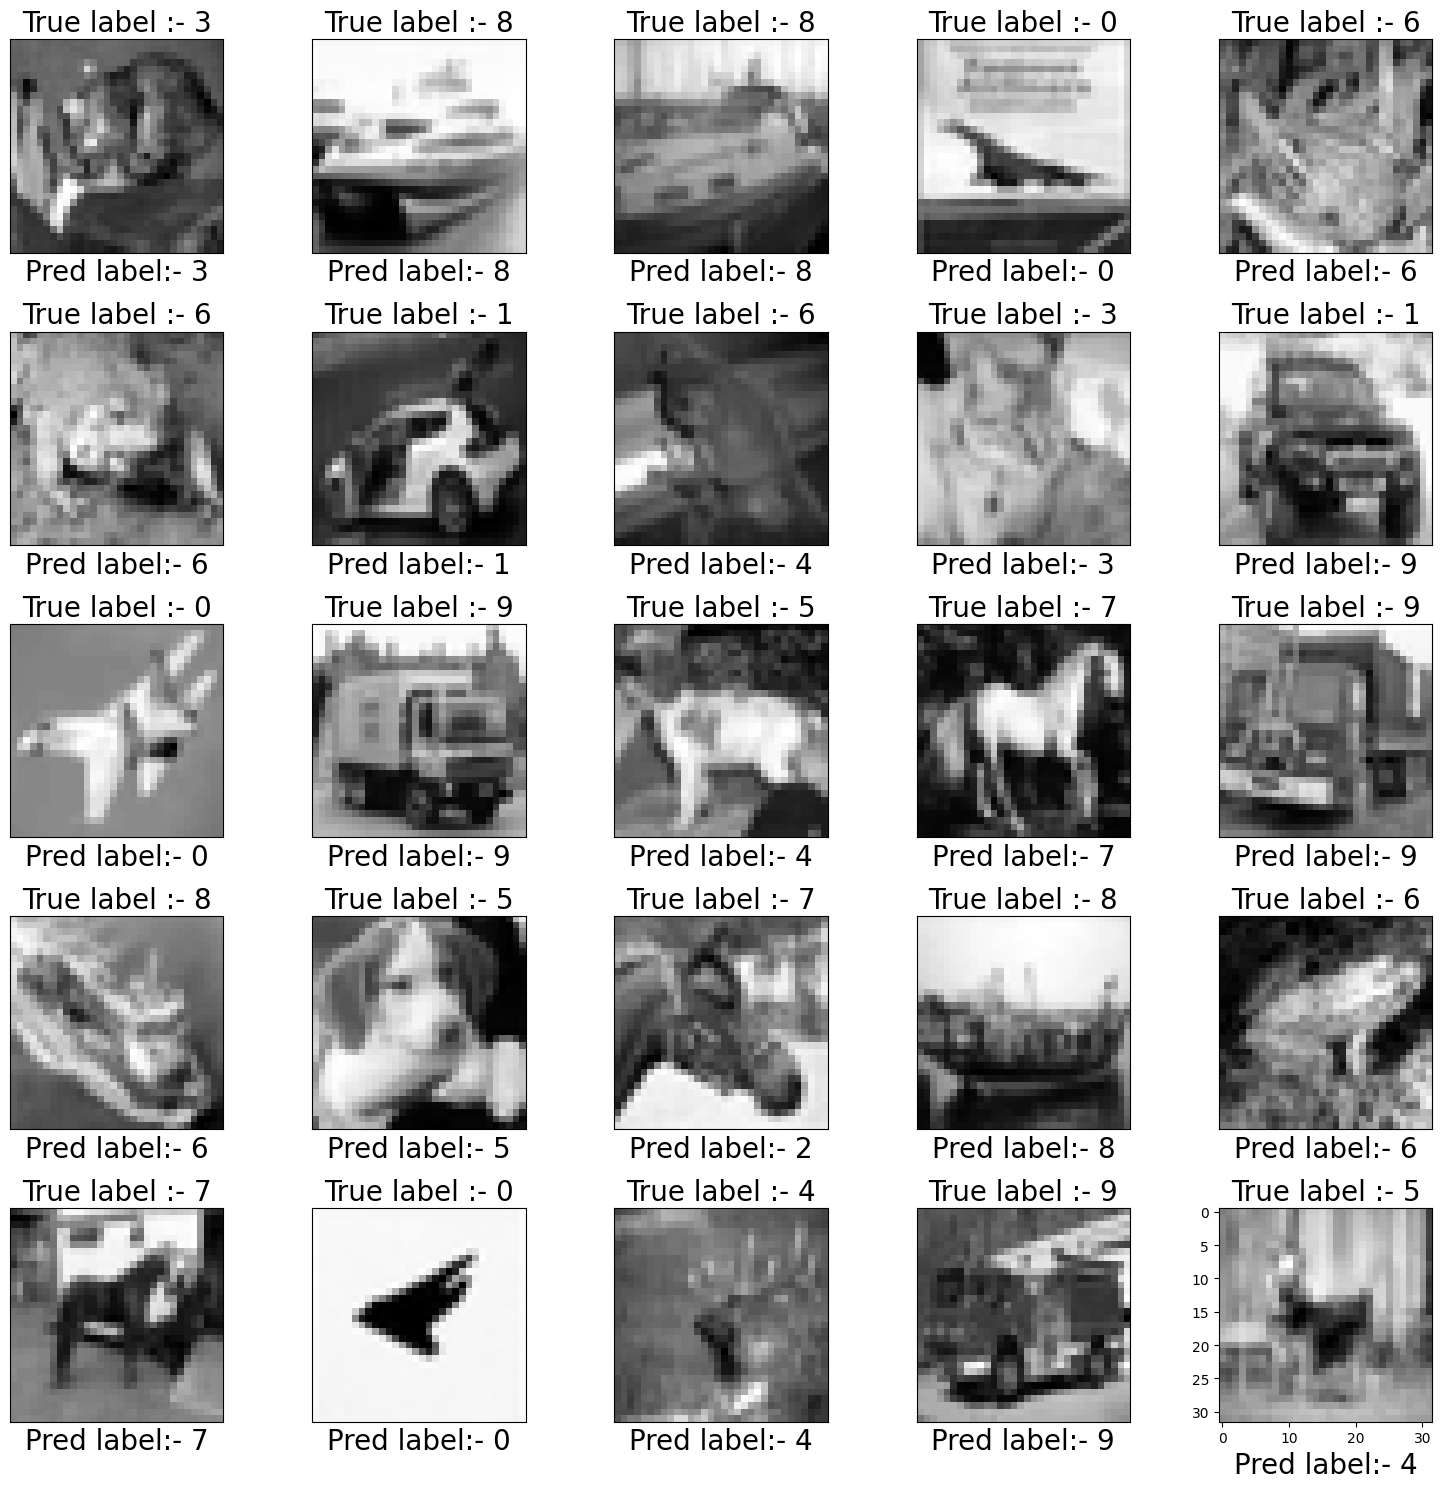

In [49]:
# Visualization of predicted data

# Model prediction
X_test_predictions = model.predict(X_test_images_gray)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test_labels, axis = 1)

plt.figure(figsize = (15, 15))
for i in range(0, 25, 1):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test_images_gray[i], cmap = "gray")
    plt.title(f"True label :- {y_test_true_labels[i]}", fontsize = 20)
    plt.xlabel(f"Pred label:- {y_test_pred_labels[i]}", fontsize = 20)

# Save the plot before displaying it
plot_filename = '/content/drive/My Drive/TCS_Sem3_IA1_output/CIFAR_Grey_predicted.png'  # Specify the desired file name and extension
plt.savefig(plot_filename)

plt.tight_layout()
plt.show()

In [50]:
# MobileNetV2: MobileNet models are designed to be lightweight and efficient,
# making them a good option when resources are limited.
# MobileNetV2 is a refined version that performs well on a
# variety of tasks.
# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Load MobileNetV2 pre-trained on ImageNet (exclude top classification layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Making all the layers.trainable = False so model doesn't relearn the weights.
for layers in base_model.layers:
    layers.trainable = False

# Add custom classification layers on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1, 1, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_4 (Dense)             (None, 128)               163968    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2423242 (9.24 MB)
Trainable params: 165258 (645.54 KB)
Non-trainable params: 2257984 (8.61 MB)
______________

In [51]:
# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs = 10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 12s 14ms/step - loss: 1.9730 - accuracy: 0.2861 - val_loss: 1.8789 - val_accuracy: 0.3257
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 1.8591 - accuracy: 0.3244 - val_loss: 1.8453 - val_accuracy: 0.3399
Epoch 3/10
625/625 [==============================] - 7s 11ms/step - loss: 1.8241 - accuracy: 0.3362 - val_loss: 1.8268 - val_accuracy: 0.3417
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 1.7974 - accuracy: 0.3464 - val_loss: 1.8180 - val_accuracy: 0.3464
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 1.7759 - accuracy: 0.3560 - val_loss: 1.8067 - val_accuracy: 0.3498
Epoch 6/10
625/625 [==============================] - 7s 11ms/step - loss: 1.7579 - accuracy: 0.3614 - val_loss: 1.7987 - val_accuracy: 0.3532
Epoch 7/10
625/625 [==============================] - 6s 9ms/step - loss: 1.7420 - accuracy: 0.3690 - val_loss: 1.7943 - val_accuracy: 0.3573
E

In [52]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Model loss :- {test_loss}")
print(f"Model Accuracy :- {test_acc * 100} %")

313/313 [==============================] - 3s 7ms/step - loss: 1.7969 - accuracy: 0.3544
Model loss :- 1.796903371810913
Model Accuracy :- 66.8500006198883 %


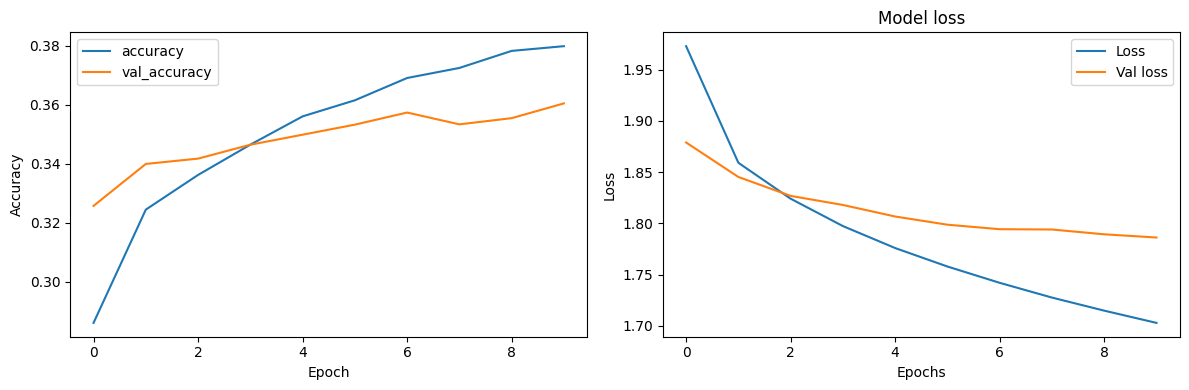

In [53]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot of model accuracy
ax1.plot(history.history["accuracy"], label="accuracy")
ax1.plot(history.history["val_accuracy"], label="val_accuracy")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.legend(loc="upper left")

# Plot for model loss
ax2.plot(history.history["loss"], label="Loss")
ax2.plot(history.history["val_loss"], label="Val loss")
ax2.set_title("Model loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["Loss", "Val loss"], loc='upper right')

# Save the plot before displaying it
plot_filename = '/content/drive/My Drive/TCS_Sem3_IA1_output/CIFAR_MobilenetV2_Accuracy_Loss.png'  # Specify the desired file name and extension
plt.savefig(plot_filename)

# Adjust layout for better spacing between subplots
plt.tight_layout()

plt.show()


In [54]:
# Model prediction and classification report
X_test_predictions = model.predict(X_test)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test, axis = 1)

# Generating the classification report
print("Classification report")
print(classification_report(y_test_true_labels, y_test_pred_labels, zero_division=0))

313/313 [==============================] - 3s 7ms/step
Classification report
              precision    recall  f1-score   support

           0       0.34      0.50      0.40      1000
           1       0.29      0.51      0.37      1000
           2       0.31      0.18      0.23      1000
           3       0.35      0.24      0.28      1000
           4       0.39      0.39      0.39      1000
           5       0.31      0.25      0.28      1000
           6       0.43      0.47      0.45      1000
           7       0.40      0.30      0.35      1000
           8       0.36      0.36      0.36      1000
           9       0.41      0.34      0.37      1000

    accuracy                           0.35     10000
   macro avg       0.36      0.35      0.35     10000
weighted avg       0.36      0.35      0.35     10000



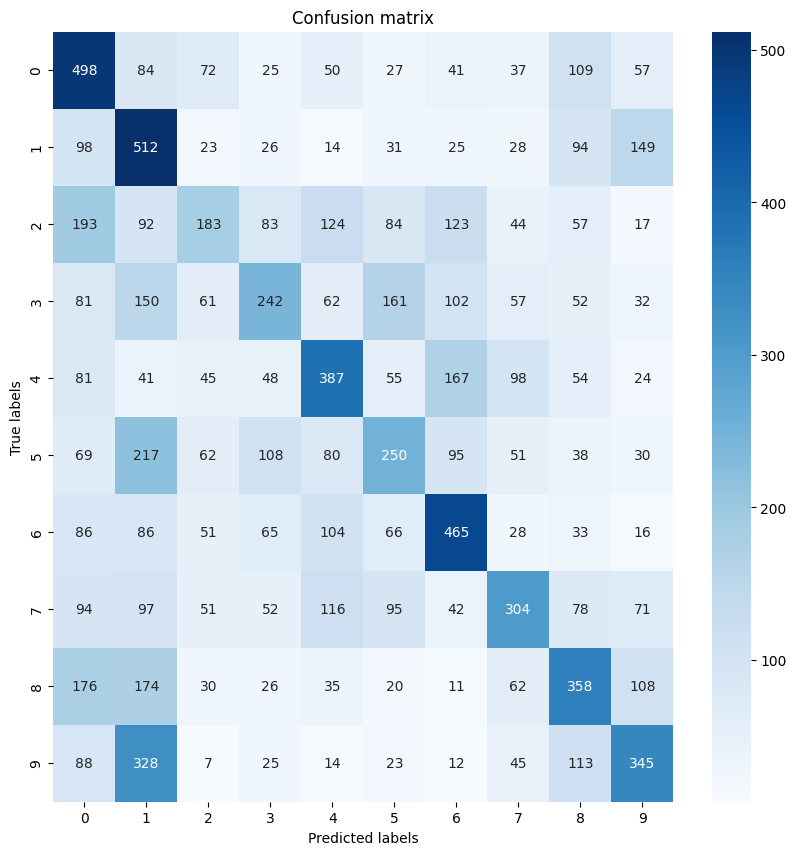

In [55]:
# Generate the Confusion matrix
conf_matrix = confusion_matrix(y_test_true_labels, y_test_pred_labels)

# Plotting the confusion matrix in the form of heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
xtickslabels = range(0, 10, 1)
ytickslabels = range(0, 10, 1)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")

# Save the plot before displaying it
plot_filename = '/content/drive/My Drive/TCS_Sem3_IA1_output/CM_3_Mobilenetv2.png'  # Specify the desired file name and extension
plt.savefig(plot_filename)

plt.show()